In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
import pandas as pd


from nltk.tokenize import RegexpTokenizer

import os

import gensim
from gensim import corpora, models

import pyLDAvis.gensim as gensimvis
import pyLDAvis


#sns.set_style(style="white") # change the default background plot colour
#ns.set(font_scale=.7)


os.chdir('.')

In [3]:
molecule_info = pd.read_csv('_data_/_small_data_/srep00196-s2.csv', skiprows=[0,1,2,3], header=None)
molecule_info.columns = ['ingr1', 'ingr2', 'conect']

In [4]:
rec_data = pd.read_csv('_data_/_small_data_/srep00196-s3.csv', skiprows=[0,1,2,3], header=None, sep=';')
rec_data[1] = rec_data[0].apply(lambda x: str(x).split(',')[0])


rec_data[0] = rec_data[0].apply(lambda x: (str(x).split(',')[1:]))



rec_data.columns = ['ingredients', 'kitchen']

In [5]:
from collections import Counter

word_counts_molecule = Counter()

for col in ['ingr1', 'ingr2']:
    for item in molecule_info[col]:
        word_counts_molecule.update(Counter(item))


In [6]:
for col in ['ingr1', 'ingr2']:
    for item in molecule_info[col]:
        word_counts_molecule.update(Counter(item))

In [7]:
recipe_words = Counter()

In [8]:
for item in rec_data["ingredients"]:
    for name in item:
        recipe_words[name]+=1        

In [9]:
dictionary = corpora.Dictionary(list(rec_data["ingredients"]))

In [10]:
array = np.asarray(list(rec_data["ingredients"]))

In [11]:
corpus = [dictionary.doc2bow(word) for word in array]

In [126]:

__num_class__ = 16

ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=__num_class__, id2word = dictionary)

In [127]:
#ldamodel.print_topics(num_topics=20, num_words=20)

In [128]:
vis_data = gensimvis.prepare(ldamodel, corpus, dictionary)

In [129]:
pyLDAvis.display(vis_data)

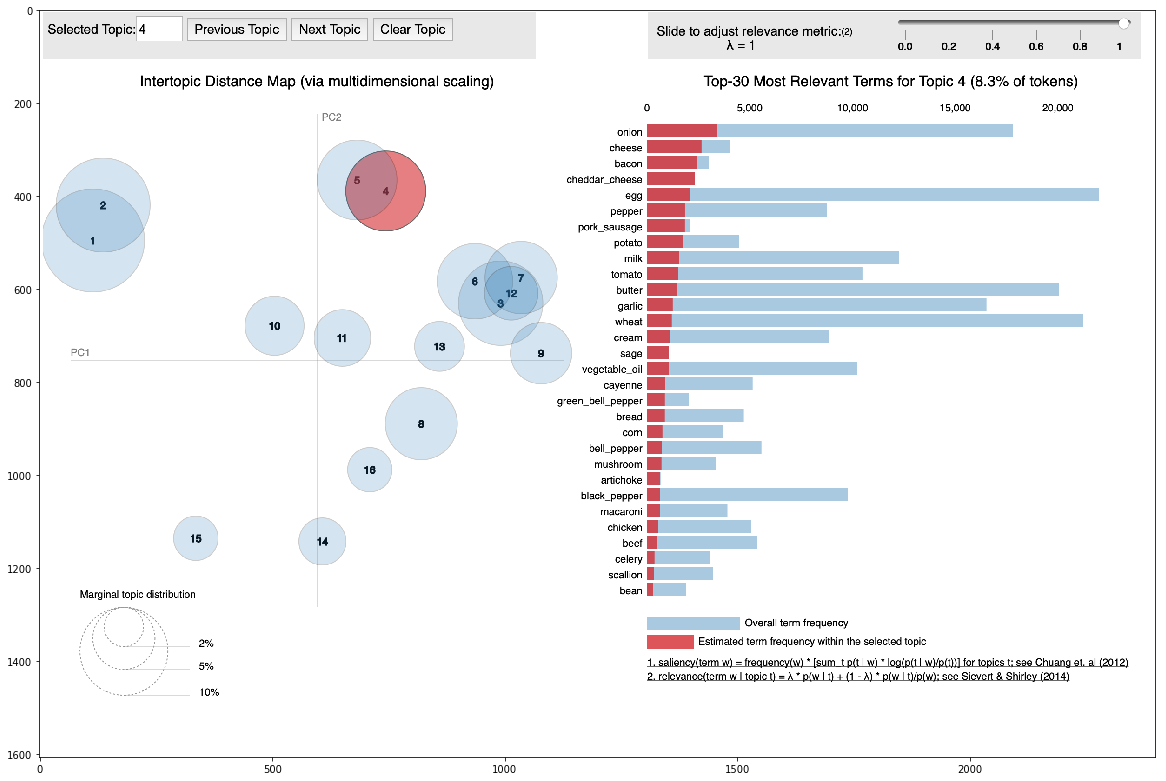

In [138]:
import PIL
fig,axes = plt.subplots(figsize=(20,14))
plt.imshow(PIL.Image.open("gensim.png"))
plt.show()

In [130]:
data_desert  = np.load("_data_/_recipes_/data_desert.npy")
data_beef    = np.load("_data_/_recipes_/data_beef.npy")
data_chicken = np.load("_data_/_recipes_/data_chicken.npy")
data_fish    = np.load("_data_/_recipes_/data_fish.npy")
data_pizza   = np.load("_data_/_recipes_/data_pizza.npy")

In [131]:
def ingr(d):
    ingr_list = []
    for line in d:
        ingr_list.append(line[2])
    return(ingr_list)
def corpusizer(data_pizza):
    pizza_corpus = []
    for rec in data_pizza:
        pizza_corpus.append(
        ingr(rec["ingredients"])
        )
    return(pizza_corpus)

pizza_corpus_data =  corpusizer(data_pizza)
desert_corpus_data =  corpusizer(data_desert)
beef_corpus_data =  corpusizer(data_beef)
fish_corpus_data =  corpusizer(data_fish)



In [132]:
pizza_corpus = [dictionary.doc2bow(text) for text in pizza_corpus_data]
desrt_corpus = [dictionary.doc2bow(text) for text in desert_corpus_data]
fish_corpus = [dictionary.doc2bow(text) for text in fish_corpus_data]
beef_corpus = [dictionary.doc2bow(text) for text in beef_corpus_data]



vector_pizza = ldamodel[pizza_corpus]
vector_desert = ldamodel[desrt_corpus]
vector_fish = ldamodel[fish_corpus]
vector_beef = ldamodel[beef_corpus]

In [133]:
def histogramer(vector_desert):
    hist_line = np.zeros(__num_class__)
    for one_vector in vector_desert:
        for line in one_vector:
            hist_line[line[0]] += line[1]
    return(hist_line)

desert_hist = histogramer(vector_desert)
pizza_hist = histogramer(vector_pizza)

fish_hist = histogramer(vector_fish)
beef_hist = histogramer(vector_beef)

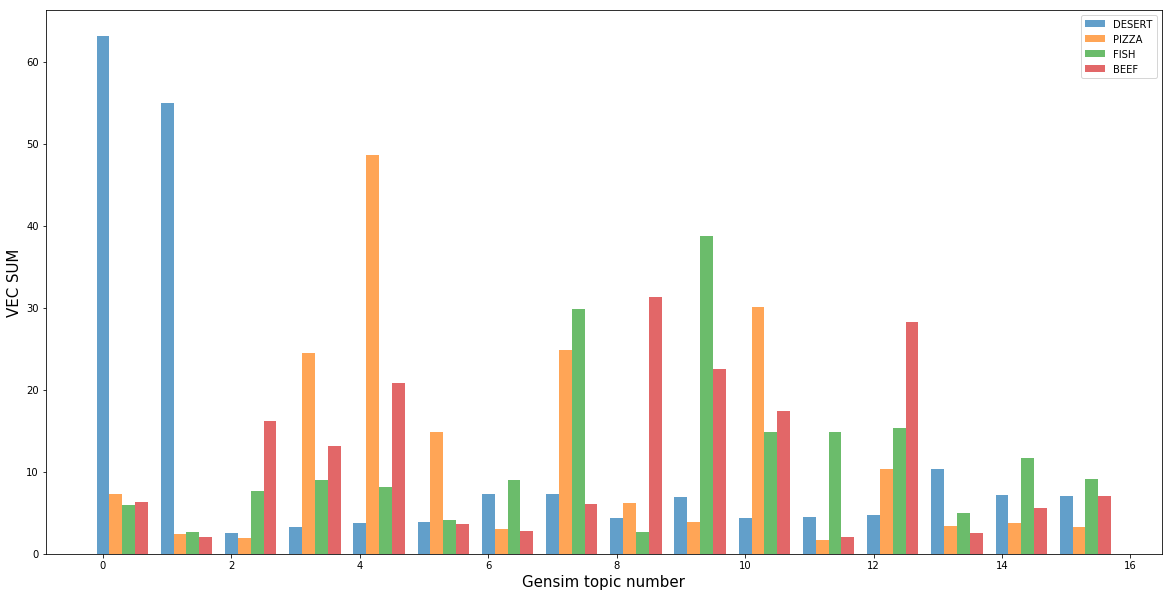

In [136]:
fig,axes = plt.subplots(figsize=(20,10))
width = 0.2
index = np.arange(__num_class__)

plt.bar(index  + 0, desert_hist,width, alpha = 0.7, label='DESERT')
plt.bar(index + 0.2 , pizza_hist, width,alpha = 0.7, label='PIZZA')

plt.bar(index+ 0.4, fish_hist,width, alpha = 0.7, label='FISH')

plt.bar(index+0.6, beef_hist,width, alpha = 0.7, label='BEEF')




plt.xlabel('Gensim topic number', fontsize=15)
plt.ylabel('VEC SUM', fontsize=15)
plt.legend()
plt.show()
